In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering
from numpy.linalg import eig
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

In [2]:
online=pd.read_csv('online_shoppers_intention.csv')
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
import sweetviz as sv
sweet_report = sv.analyze(online)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
online.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
online['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [8]:
r={'Feb':2,'Mar':3,'May':5,'Oct':10,'June':6,'Jul':7,'Aug':8,'Nov':11,'Sep':9,'Dec':12}
online['Month']=online['Month'].map(r)
online.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [9]:
online['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [10]:
online['Month']=online['Month'].astype('int')
online.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int32
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [11]:
online['Weekend']=online['Weekend'].astype('int')
online['Revenue']=online['Revenue'].astype('int')

num=online.select_dtypes(include=np.number)
cat=online.select_dtypes(exclude=np.number)
cat=pd.get_dummies(cat,drop_first=True)
x=pd.concat([cat,num],axis=1)
x.head()

,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0
1,0,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0
2,0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0
3,0,1,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0
4,0,1,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0


In [12]:
x.dtypes

VisitorType_Other                  uint8
VisitorType_Returning_Visitor      uint8
Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
Month                              int32
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int32
Revenue                            int32
dtype: object

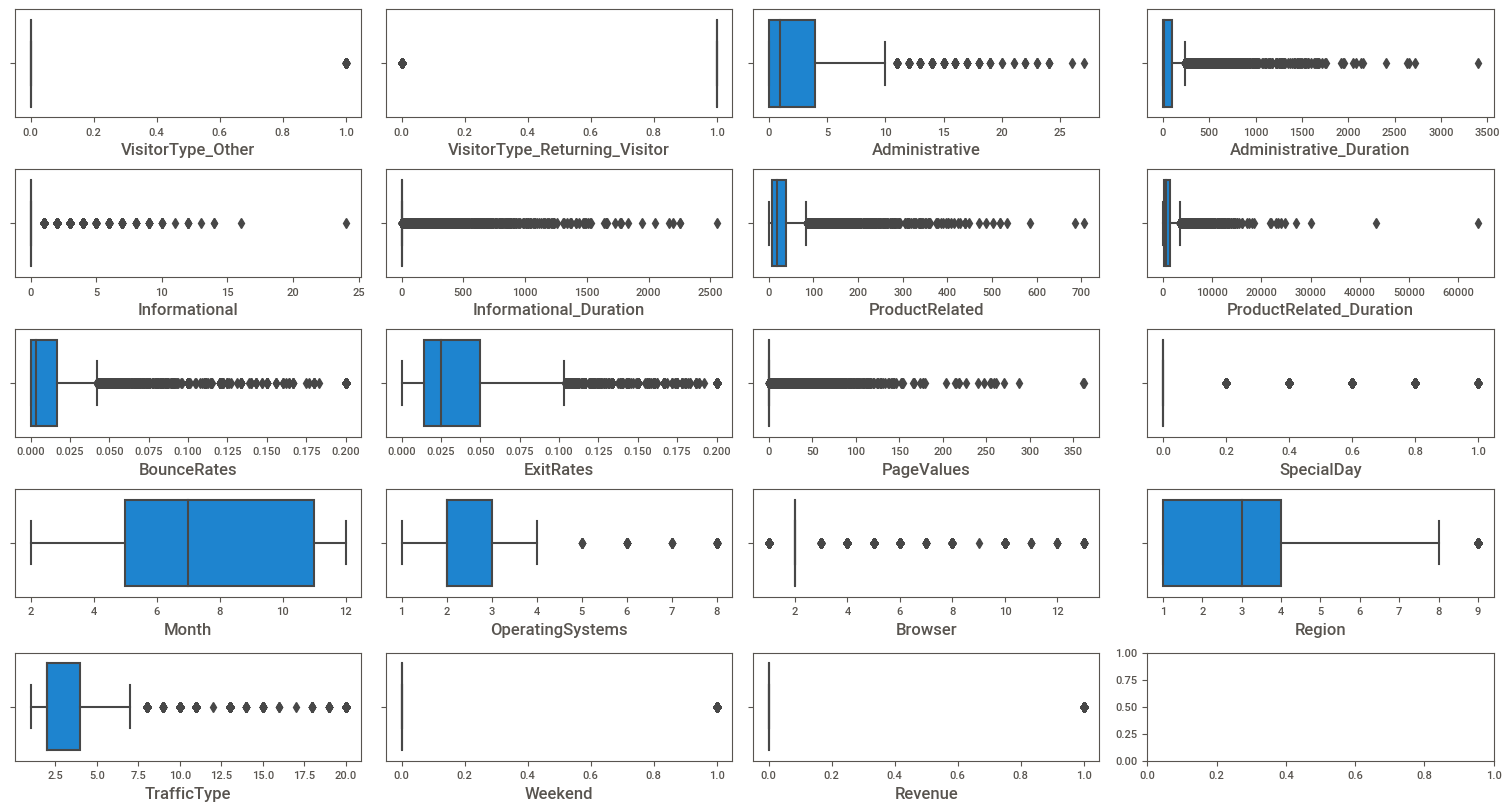

In [13]:
fig,ax=plt.subplots(nrows=5,ncols=4,figsize=(15,8),constrained_layout=True)
for v,s in zip(x.columns,ax.flatten()):
    sns.boxplot(x[v],ax=s)
plt.show()

In [14]:
q1=x.quantile(0.25)
q3=x.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr

data=x[~((x>ul)|(x<ll)).any(axis=1)]

data.shape

(1590, 19)

In [15]:
sc=StandardScaler()
data1=sc.fit_transform(data)
dt=pd.DataFrame(data1,columns=x.columns)
dt.head()

,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,-0.609092,-0.555926,0.0,0.0,-1.062382,-0.899188,-0.685123,2.772564,0.0,0.0,-1.481284,-0.478432,0.0,-0.921919,-0.236310,0.0,0.0
1,0.0,0.0,-0.609092,-0.555926,0.0,0.0,-0.070424,-0.774904,0.754071,-0.427876,0.0,0.0,-1.481284,-0.478432,0.0,-0.921919,0.516662,0.0,0.0
2,0.0,0.0,-0.609092,-0.555926,0.0,0.0,-1.062382,-0.893677,-0.685123,2.772564,0.0,0.0,-1.481284,1.274349,0.0,-0.007762,0.516662,0.0,0.0
3,0.0,0.0,-0.609092,-0.555926,0.0,0.0,-1.062382,-0.943271,-0.685123,2.772564,0.0,0.0,-1.481284,-0.478432,0.0,-0.921919,0.516662,0.0,0.0
4,0.0,0.0,-0.609092,-0.555926,0.0,0.0,-1.004032,-0.842706,-0.685123,-0.055732,0.0,0.0,-1.481284,1.274349,0.0,-0.921919,2.022606,0.0,0.0


In [16]:
cluster_errors=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(dt)
    cluster_errors.append(kmeans.inertia_)
cluster_errors

[15899.999999999984,
 13337.374304548233,
 11864.054212081408,
 10702.346565595668,
 9933.709492583172,
 9269.709855551611,
 8716.561985131162,
 8267.433963052883,
 7860.404832447367]

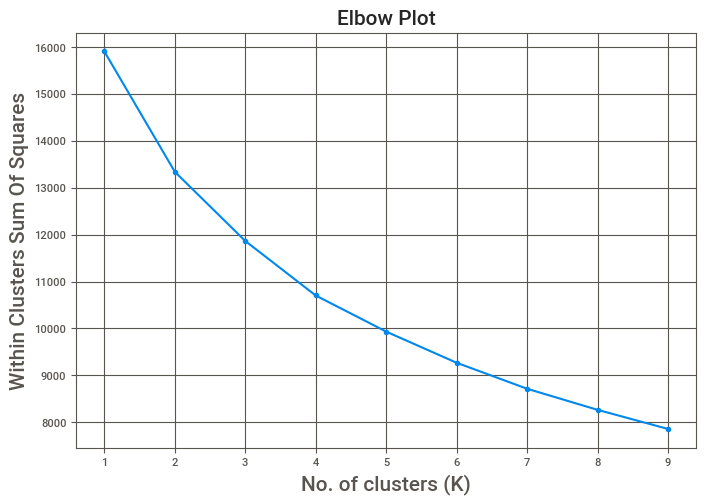

In [17]:
plt.plot(range(1,10), cluster_errors,marker='o')

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('Within Clusters Sum Of Squares', fontsize = 15)
plt.grid(True)
plt.show()

In [18]:
m=[]
for K in range(2,11):
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(dt)
    score = silhouette_score(dt, predict, random_state= 10)
    m.append(score)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.19682297034318505)
For 3 clusters the silhouette score is 0.18129199749481129)
For 4 clusters the silhouette score is 0.16683412275193635)
For 5 clusters the silhouette score is 0.14869466061016343)
For 6 clusters the silhouette score is 0.14968444273536102)
For 7 clusters the silhouette score is 0.1576465800376127)
For 8 clusters the silhouette score is 0.1539375634065636)
For 9 clusters the silhouette score is 0.1520811715719119)
For 10 clusters the silhouette score is 0.15010579207216176)


the score of  2 is 0.19694721979111757


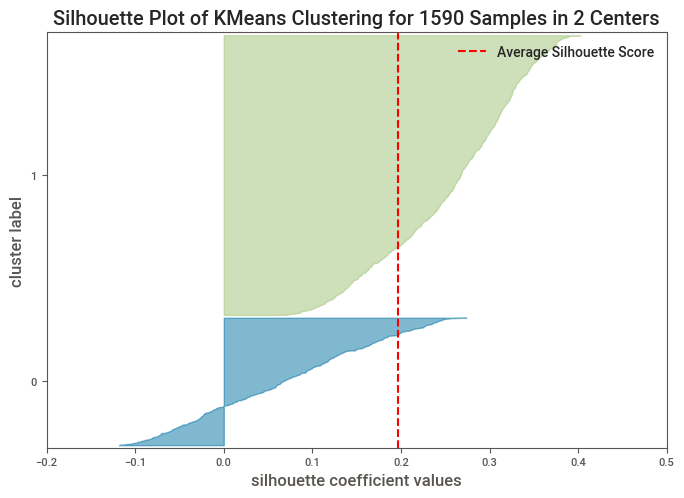

the score of  3 is 0.18129199749481129


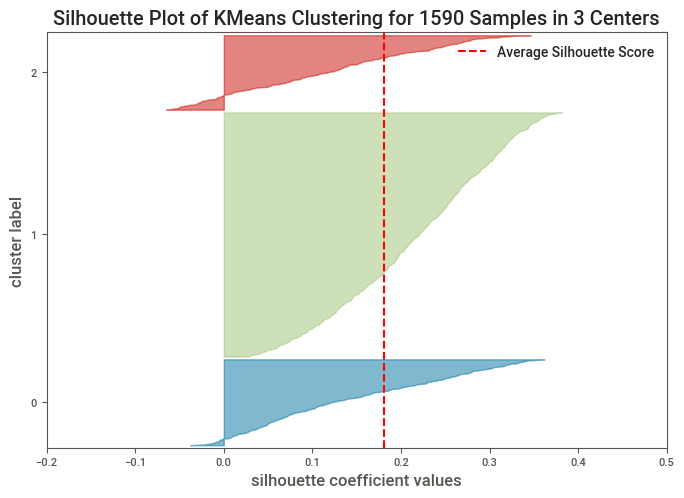

the score of  4 is 0.16696786879623104


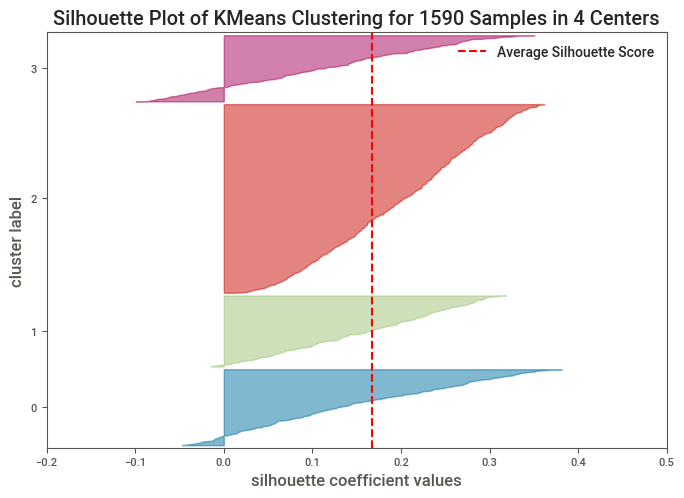

the score of  5 is 0.14865268176475582


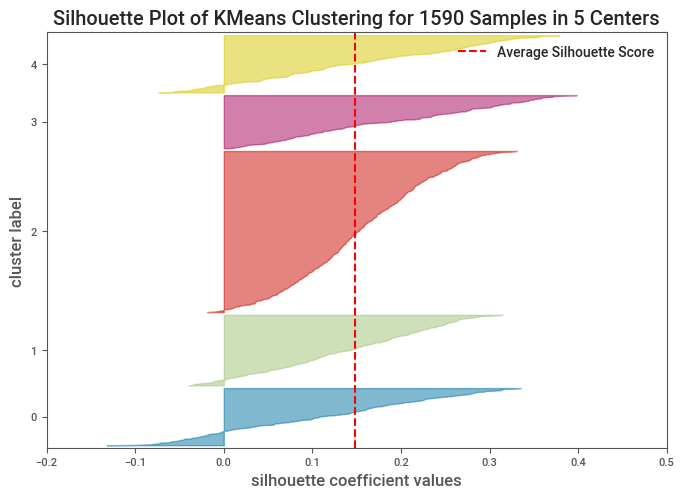

the score of  6 is 0.14878630329197695


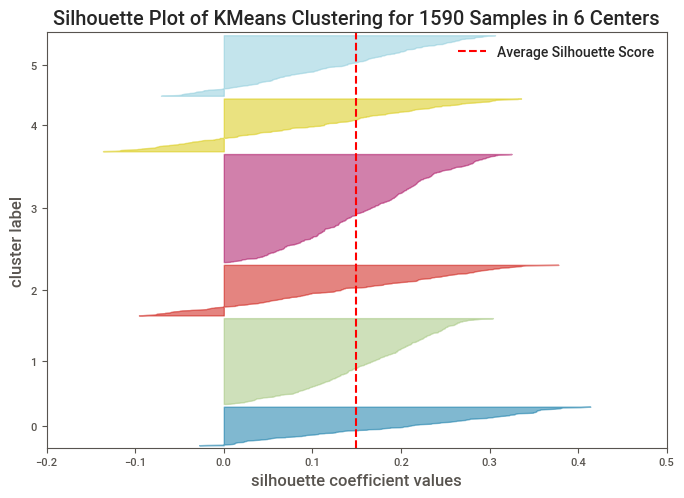

the score of  7 is 0.15728107029919491


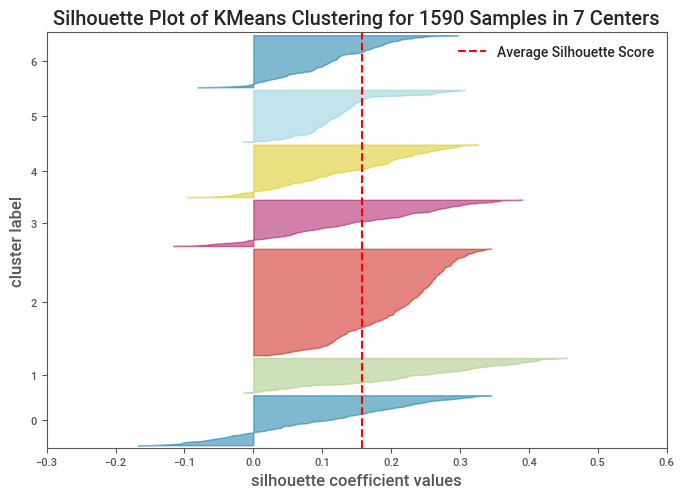

the score of  8 is 0.15427029236054574


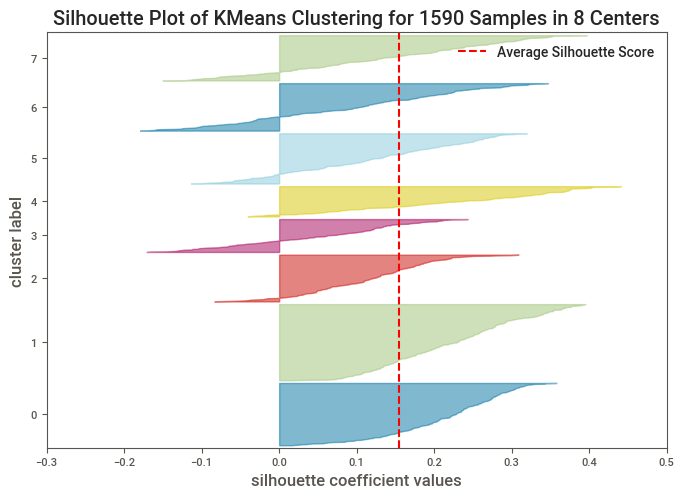

the score of  9 is 0.15194557303655537


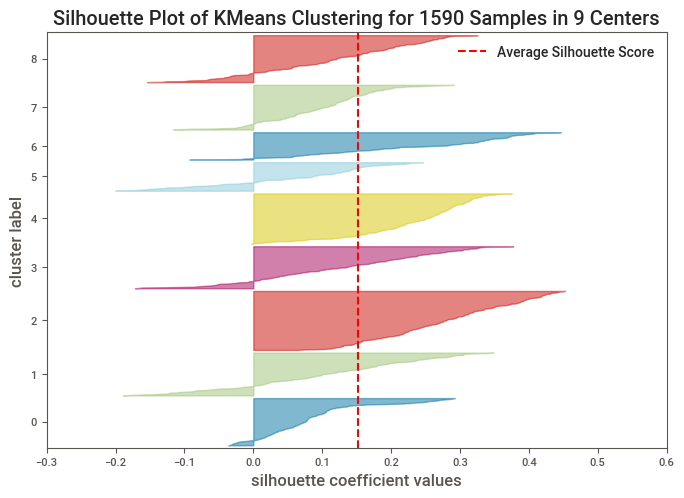

the score of  10 is 0.14871023735393438


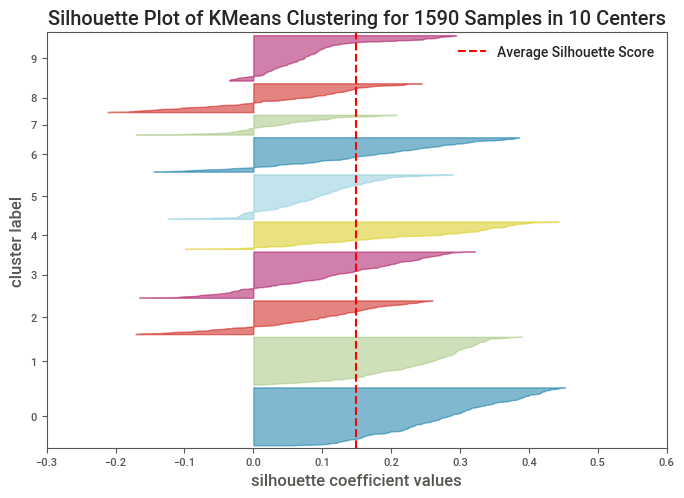

In [19]:
for i in range(2,11):
    model=KMeans(n_clusters=i)
    model.fit(dt)
    score=silhouette_score(dt,model.labels_,random_state=10)
    print('the score of ',i,'is',score)
    visual=SilhouetteVisualizer(model,colors='yellowbrick')
    visual.fit(dt)
    visual.show()

In [20]:
cluster_errors=[]
for i in range(1,3):
    kmeans_1= KMeans(n_clusters = i, random_state = 10)
    kmeans_1.fit(dt)
    cluster_errors.append(kmeans.inertia_)
cluster_errors

[7860.404832447367, 7860.404832447367]

In [21]:
kmeans_1.cluster_centers_

array([[ 0.        ,  0.        ,  0.92180595,  0.92457095,  0.        ,
         0.        ,  0.86482033,  0.84490578, -0.10681042, -0.54096496,
         0.        ,  0.        ,  0.21509783, -0.01477054,  0.        ,
         0.02612988,  0.07906298,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.42161427, -0.42287892,  0.        ,
         0.        , -0.39555027, -0.38644178,  0.0488528 ,  0.24742577,
         0.        ,  0.        , -0.09838113,  0.00675573,  0.        ,
        -0.01195125, -0.03616171,  0.        ,  0.        ]])

In [25]:
data['Cluster'] = kmeans_1.labels_
data.head()

,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
1,0,1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,0,0,1
5,0,1,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,0,1
14,0,1,0,0.0,0,0.0,2,68.000000,0.000000,0.100000,0.0,0.0,2,3,2,3,3,0,0,1
18,0,1,0,0.0,0,0.0,2,32.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,3,0,0,1
22,0,1,0,0.0,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,2,3,2,1,5,0,0,1


In [24]:
len(data)

1590

In [26]:
obs=data['Cluster'].value_counts()
obs

1    1091
0     499
Name: Cluster, dtype: int64

In [27]:
centroids=kmeans_1.cluster_centers_
centroids=pd.DataFrame(centroids,columns=dt.columns)
centroids

,VisitorType_Other,VisitorType_Returning_Visitor,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0.0,0.0,0.921806,0.924571,0.0,0.0,0.86482,0.844906,-0.106810,-0.540965,0.0,0.0,0.215098,-0.014771,0.0,0.026130,0.079063,0.0,0.0
1,0.0,0.0,-0.421614,-0.422879,0.0,0.0,-0.39555,-0.386442,0.048853,0.247426,0.0,0.0,-0.098381,0.006756,0.0,-0.011951,-0.036162,0.0,0.0


In [28]:
link_mat = linkage(data1, method = 'ward')     
print(link_mat[0:10])

[[1.59000000e+02 2.53000000e+02 1.92865669e-02 2.00000000e+00]
 [4.50000000e+01 2.66000000e+02 2.06641788e-02 2.00000000e+00]
 [4.30000000e+02 5.04000000e+02 2.06641788e-02 2.00000000e+00]
 [1.28000000e+02 1.89000000e+02 2.31898006e-02 2.00000000e+00]
 [2.96000000e+02 3.20000000e+02 2.34194026e-02 2.00000000e+00]
 [1.49000000e+02 1.94000000e+02 4.40835814e-02 2.00000000e+00]
 [1.48000000e+02 2.33000000e+02 4.68388052e-02 2.00000000e+00]
 [6.95000000e+02 7.28000000e+02 5.78597006e-02 2.00000000e+00]
 [2.23000000e+02 3.13000000e+02 5.93821288e-02 2.00000000e+00]
 [1.58000000e+02 2.22000000e+02 6.60722766e-02 2.00000000e+00]]


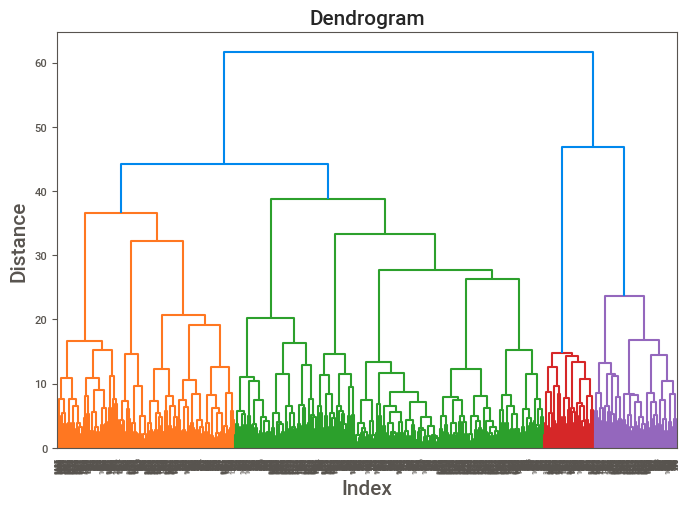

In [45]:
dendrogram(link_mat)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.show()

In [34]:
eucli_dist = euclidean_distances(data1)
eucli_dist.shape

(1590, 1590)

In [35]:
dist_array = eucli_dist[np.triu_indices(1590, k = 1)]
coeff, cophenet_dist = cophenet(link_mat, dist_array)
print(coeff)

0.5117171909387084


In [36]:
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters.fit(data1)

AgglomerativeClustering()

In [37]:
cov_matrix=np.cov(dt.T)
cov_matrix[0:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.00062933,  0.78086937,  0.        ,
         0.        ,  0.22422858,  0.15043588, -0.02585573, -0.25416325,
         0.        ,  0.        ,  0.04740673, -0.00386998,  0.        ,
         0.03241315,  0.07601063,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.78086937,  1.00062933,  0.        ,
         0.        ,  0.17632643,  0.15083776, -0.00859642, -0.23815994,
         0.   

In [38]:
eigval,eig_vector=eig(cov_matrix)
print("eigen values",eigval)
print("eigen vector",eig_vector)

eigen values [2.38889964 1.4885231  0.20572721 0.26759883 0.50001225 1.26705138
 1.08066366 0.87724518 0.93865858 0.99191345 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
eigen vector [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.50178824e-01 -4.62464910e-01 -6.46847994e-01  2.94643863e-01
   6.88775537e-02 -2.13328822e-01  1.08127608e-01  6.10260095e-03
  -1.52561837e

In [39]:
var=[]
for i in eigval:
    variation=(i/sum(eigval))*100
    var.append(variation)
var

[23.873971827614575,
 14.875869181194574,
 2.055978180501733,
 2.6743052926458692,
 4.996977770684761,
 12.662544943921128,
 10.799839986051971,
 8.766934577084449,
 9.380682238111374,
 9.912896002189566,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [40]:
np.cumsum(var)


array([ 23.87397183,  38.74984101,  40.80581919,  43.48012448,
        48.47710225,  61.1396472 ,  71.93948718,  80.70642176,
        90.087104  , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [42]:
pca=PCA(n_components=8).fit_transform(dt)
df_pca=pd.DataFrame(pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.715849,-0.606678,0.088703,-0.602857,-0.974886,-0.668191,0.972670,1.871172
1,-0.985711,-0.084705,-0.434140,0.144350,-0.339824,-0.655380,1.544246,-1.136571
2,-2.676074,-0.932163,0.587593,0.553730,0.636812,-0.802387,0.662522,2.128951
3,-2.719600,-0.785684,0.098522,-0.135696,-0.886892,-0.273790,1.364667,1.861263
4,-1.492586,-1.261789,-0.928964,2.130861,0.538299,-0.570534,1.331924,0.105962


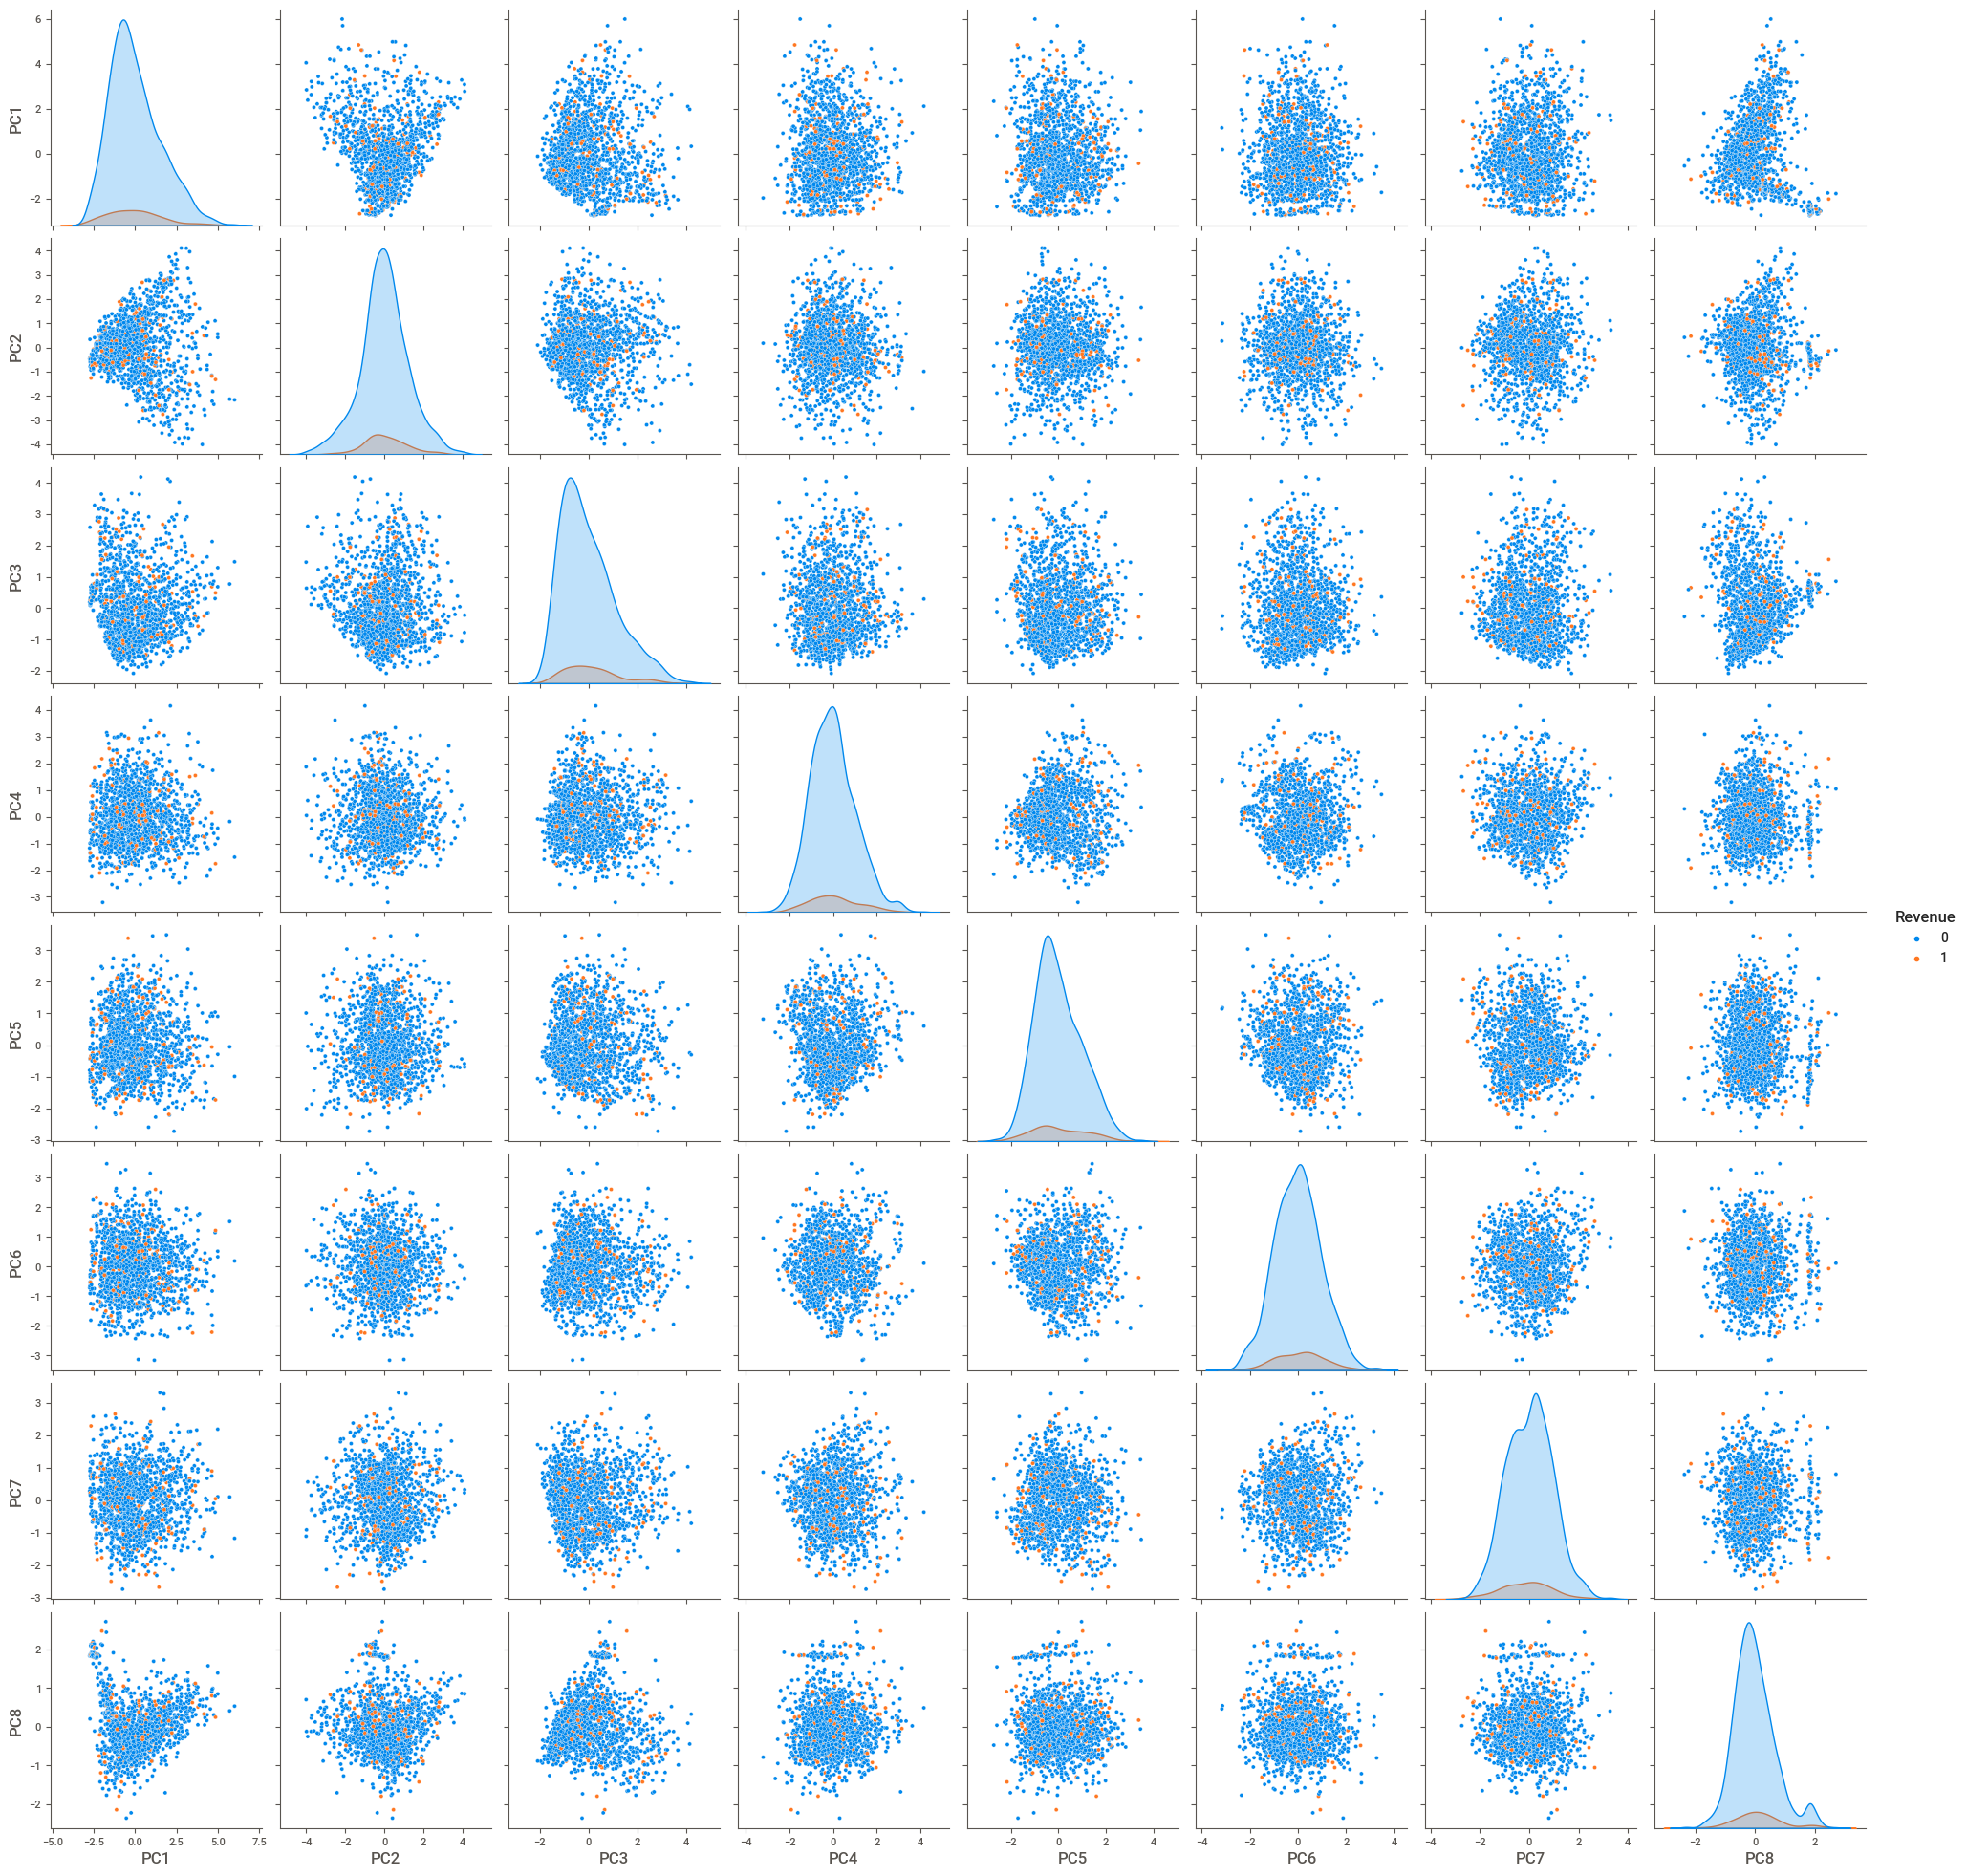

In [44]:
df_pca['Revenue']=x['Revenue']
sns.pairplot(data=df_pca,hue='Revenue')
plt.show()